### Lam Hong Kevin Ching 1009243043

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
%pip install pingouin
from pingouin import ancova

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/KeviiinCLH/INF2178/main/INF2178_A3_data.csv")

### Data Reviwing

In [ ]:
df.shape

(11933, 9)

In [ ]:
df.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


###EDA

In [ ]:
# Changing the data type of incomegroup to object, since it is the categorical variable
df['incomegroup'] = df['incomegroup'].astype('category')

In [ ]:
print("Summary Statistics:\n", df.describe())

Summary Statistics:
        fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
count      11933.000000   11933.000000               11933.000000   
mean          35.954215      27.128244                  23.073694   
std           10.473130       9.120505                   7.396978   
min           21.010000      10.510000                   6.985000   
25%           29.340000      20.680000                  17.385000   
50%           34.060000      25.680000                  22.954000   
75%           39.890000      31.590000                  28.305000   
max          138.510000     115.650000                  47.691000   

       springreadingscore  springmathscore  springgeneralknowledgescore  \
count        11933.000000     11933.000000                 11933.000000   
mean            47.511178        37.799461                    28.235584   
std             14.327111        12.027753                     7.577457   
min             22.350000        11.900000               

<Figure size 2000x700 with 0 Axes>

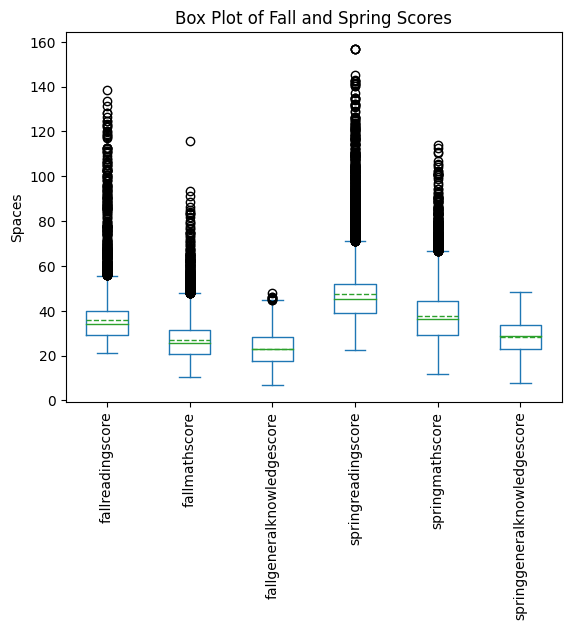

In [ ]:
df_score = df[['fallreadingscore','fallmathscore', 'fallgeneralknowledgescore','springreadingscore','springmathscore', 'springgeneralknowledgescore',]]
plt.figure(figsize=(20, 7))
df_score.plot.box(showmeans = True, meanline = True)
plt.xticks(rotation=90)
plt.title('Box Plot of Fall and Spring Scores')
plt.ylabel('Spaces')
plt.show()

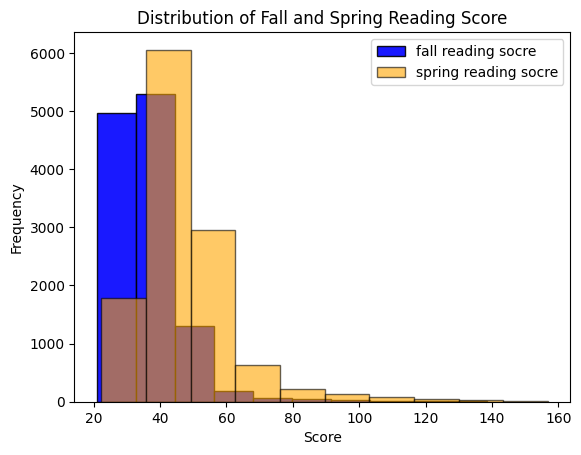

In [ ]:
# plotting first histogram
plt.hist(df['fallreadingscore'], label='fall reading socre', alpha=.9, color='blue', edgecolor='black')

# plotting second histogram
plt.hist(df['springreadingscore'], label='spring reading socre', alpha=.6, color='orange', edgecolor='black')

plt.legend()
plt.title('Distribution of Fall and Spring Reading Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

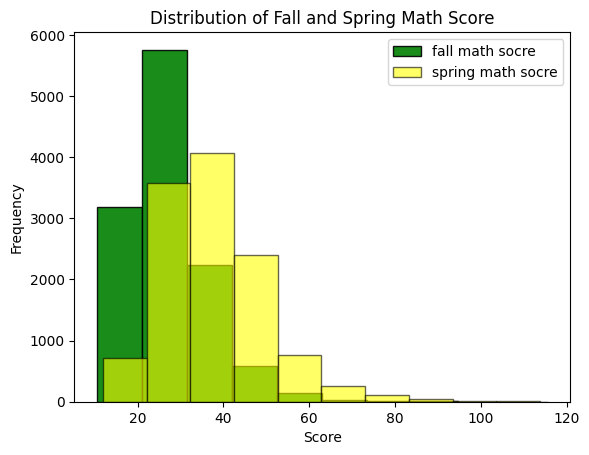

In [ ]:
# plotting first histogram
plt.hist(df['fallmathscore'], label='fall math socre', alpha=.9, color='green', edgecolor='black')

# plotting second histogram
plt.hist(df['springmathscore'], label='spring math socre', alpha=.6, color='yellow', edgecolor='black')

plt.legend()
plt.title('Distribution of Fall and Spring Math Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

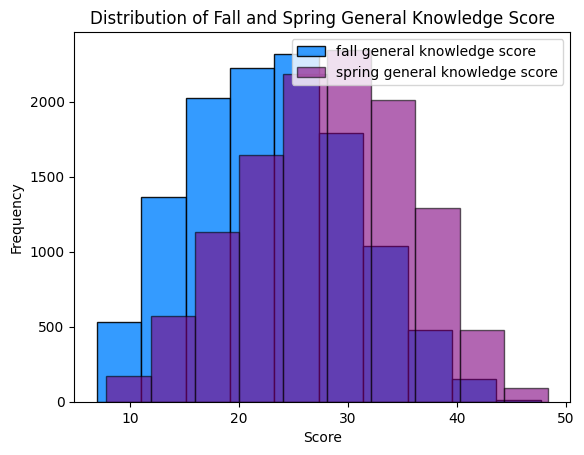

In [ ]:
# plotting first histogram
plt.hist(df['fallgeneralknowledgescore'], label='fall general knowledge score', alpha=.9, color='dodgerblue', edgecolor='black')

# plotting second histogram
plt.hist(df['springgeneralknowledgescore'], label='spring general knowledge score', alpha=.6, color='purple', edgecolor='black')

plt.legend()
plt.title('Distribution of Fall and Spring General Knowledge Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

###**Research Question 1: Does income category affect the improvement in reading scores from Fall 1998 to Spring 1999 when controlling for the initial reading level?**

<Figure size 1000x800 with 0 Axes>

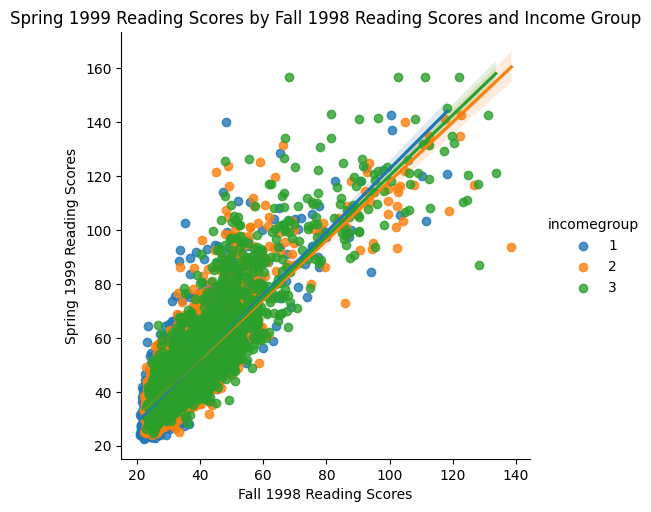

In [ ]:
plt.figure(figsize=(10, 8))
scatter_plot = sns.lmplot(x='fallreadingscore', y='springreadingscore', hue='incomegroup', data=df)

# Enhancing the plot with appropriate labels and title.
plt.title('Spring 1999 Reading Scores by Fall 1998 Reading Scores and Income Group')
plt.xlabel('Fall 1998 Reading Scores')
plt.ylabel('Spring 1999 Reading Scores')

plt.show()

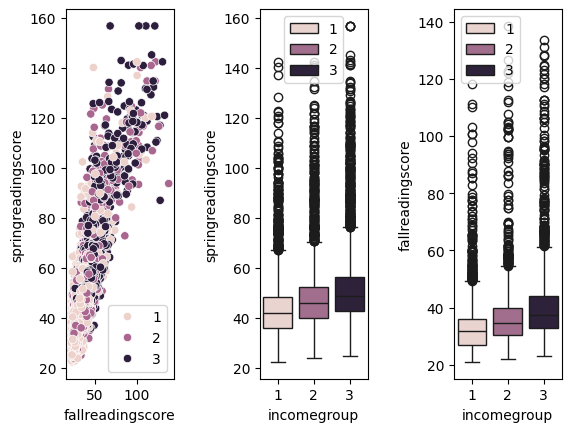

In [ ]:
fig, axs = plt.subplots(ncols=3)
sns.scatterplot(data=df, x="fallreadingscore", y="springreadingscore", hue=df.incomegroup.tolist(), ax=axs[0])
sns.boxplot(data=df, x="incomegroup", y="springreadingscore", hue=df.incomegroup.tolist(), ax=axs[1])
sns.boxplot(data=df, x="incomegroup", y="fallreadingscore", hue=df.incomegroup.tolist(), ax=axs[2])
plt.subplots_adjust(wspace=0.8)
plt.show()


In [ ]:
ancova(data=df, dv='springreadingscore', covar='fallreadingscore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,5.131201e+02,2,4.055660,0.017348,0.00068
1,fallreadingscore,1.547042e+06,1,24455.397576,0.000000,0.67214
2,Residual,7.546256e+05,11929,NaN,NaN,NaN


In [ ]:
# Fit the ANCOVA model
model = sm.formula.ols('springreadingscore ~ fallreadingscore + C(incomegroup)', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     8929.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:47:26   Log-Likelihood:                -41675.
No. Observations:               11933   AIC:                         8.336e+04
Df Residuals:                   11929   BIC:                         8.339e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5430    

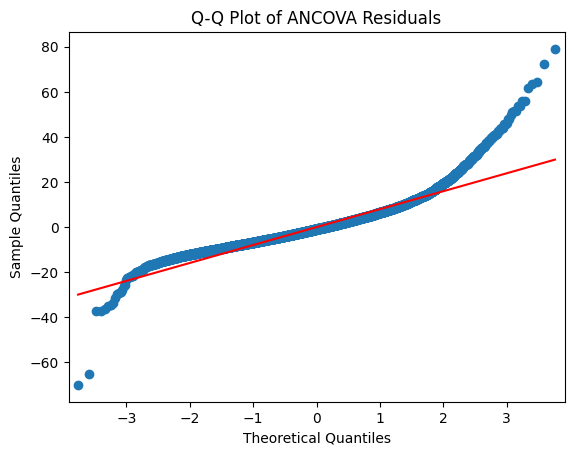

In [ ]:
# Normality of residuals: Q-Q plot and Shapiro-Wilk test
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of ANCOVA Residuals')
plt.show()

In [ ]:
shapiro_test = stats.shapiro(residuals)
shapiro_test

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9119972586631775, pvalue=0.0)

In [ ]:
# Homogeneity of variances: Levene's test
levene_test = stats.levene(df['springreadingscore'][df['incomegroup'] == 1],
                           df['springreadingscore'][df['incomegroup'] == 2],
                           df['springreadingscore'][df['incomegroup'] == 3])
levene_test

LeveneResult(statistic=39.5528295964788, pvalue=7.570499656193536e-18)

###**Research Question 2: Is there a difference in math score improvements across income categories, after adjusting for initial math skills?**

<Figure size 1000x800 with 0 Axes>

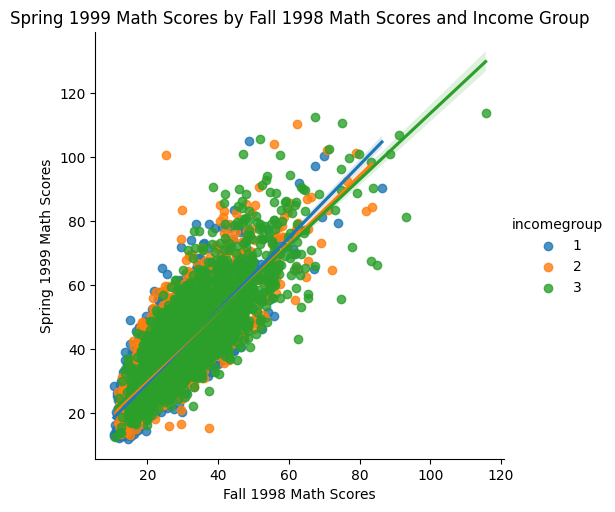

In [ ]:
plt.figure(figsize=(10, 8))
scatter_plot = sns.lmplot(x='fallmathscore', y='springmathscore', hue='incomegroup', data=df)

plt.title('Spring 1999 Math Scores by Fall 1998 Math Scores and Income Group')
plt.xlabel('Fall 1998 Math Scores')
plt.ylabel('Spring 1999 Math Scores')

plt.show()

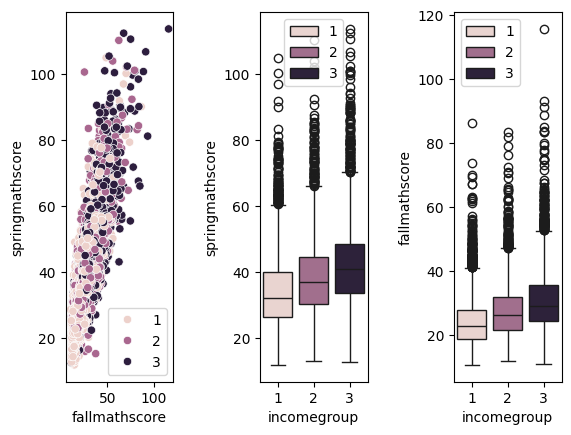

In [ ]:
fig, axs = plt.subplots(ncols=3)
sns.scatterplot(data=df, x="fallmathscore", y="springmathscore", hue=df.incomegroup.tolist(), ax=axs[0])
sns.boxplot(data=df, x="incomegroup", y="springmathscore", hue=df.incomegroup.tolist(), ax=axs[1])
sns.boxplot(data=df, x="incomegroup", y="fallmathscore", hue=df.incomegroup.tolist(), ax=axs[2])
plt.subplots_adjust(wspace=0.8)
plt.show()

In [ ]:
ancova(data=df, dv='springmathscore', covar='fallmathscore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1.712758e+03,2,18.523585,9.284861e-09,0.003096
1,fallmathscore,1.026489e+06,1,22203.081238,0.000000e+00,0.650505
2,Residual,5.514994e+05,11929,NaN,NaN,NaN


In [ ]:
model = sm.formula.ols('springmathscore ~ fallmathscore + C(incomegroup)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     8469.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:51:06   Log-Likelihood:                -39804.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11929   BIC:                         7.965e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.2011    

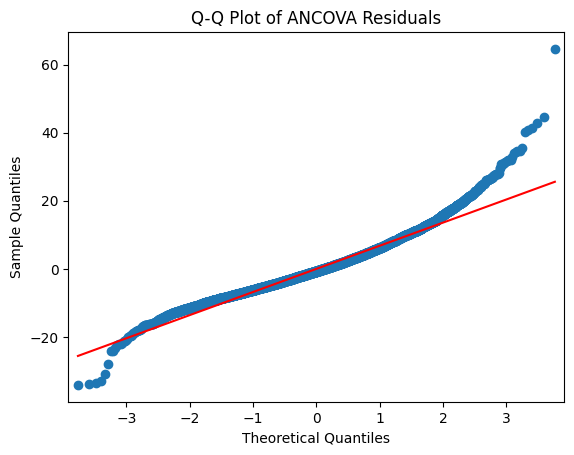

In [ ]:
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of ANCOVA Residuals')
plt.show()

In [ ]:
shapiro_test = stats.shapiro(residuals)
shapiro_test

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9649319052696228, pvalue=0.0)

In [ ]:
levene_test = stats.levene(df['springmathscore'][df['incomegroup'] == 1],
                           df['springmathscore'][df['incomegroup'] == 2],
                           df['springmathscore'][df['incomegroup'] == 3])
levene_test

LeveneResult(statistic=18.899850238111785, pvalue=6.380804527269148e-09)

###**Research Question 3: How does income category influence the change in general knowledge scores, accounting for the baseline general knowledge level?**

***Since the limitation of page, I did not interpret the third research question in the report.***

<Figure size 1000x800 with 0 Axes>

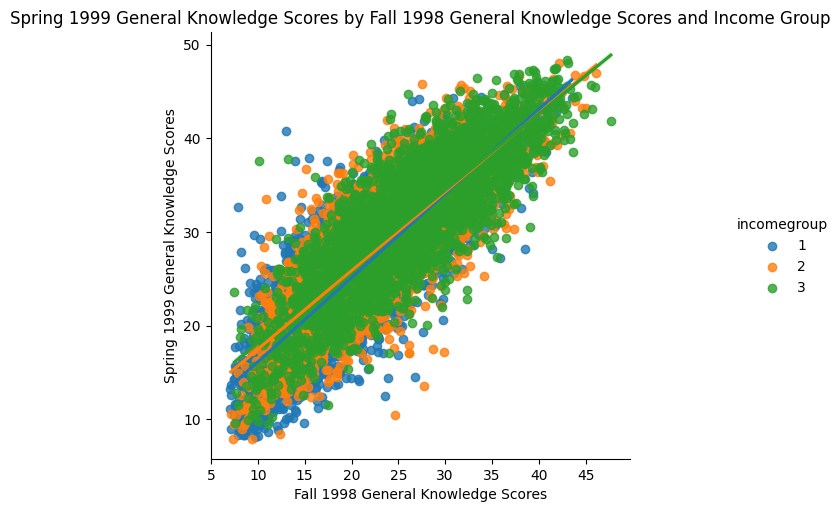

In [ ]:
plt.figure(figsize=(10, 8))
scatter_plot = sns.lmplot(x='fallgeneralknowledgescore', y='springgeneralknowledgescore', hue='incomegroup', data=df)

plt.title('Spring 1999 General Knowledge Scores by Fall 1998 General Knowledge Scores and Income Group')
plt.xlabel('Fall 1998 General Knowledge Scores')
plt.ylabel('Spring 1999 General Knowledge Scores')

plt.show()

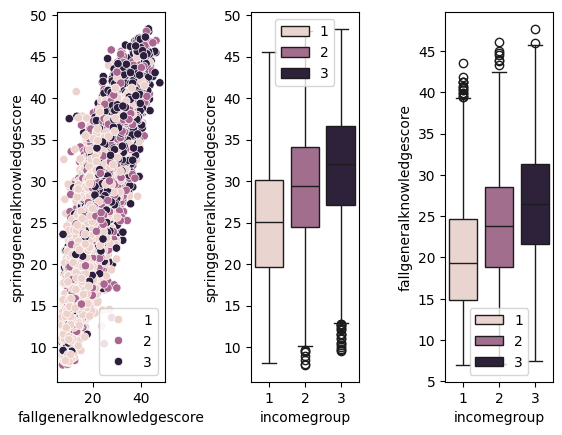

In [ ]:
fig, axs = plt.subplots(ncols=3)
sns.scatterplot(data=df, x="fallgeneralknowledgescore", y="springgeneralknowledgescore", hue=df.incomegroup.tolist(), ax=axs[0])
sns.boxplot(data=df, x="incomegroup", y="springgeneralknowledgescore", hue=df.incomegroup.tolist(), ax=axs[1])
sns.boxplot(data=df, x="incomegroup", y="fallgeneralknowledgescore", hue=df.incomegroup.tolist(), ax=axs[2])
plt.subplots_adjust(wspace=0.8)
plt.show()

In [ ]:
ancova(data=df, dv='springgeneralknowledgescore', covar='fallgeneralknowledgescore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1756.904469,2,56.908040,2.525291e-25,0.009451
1,fallgeneralknowledgescore,411876.768316,1,26682.269841,0.000000e+00,0.691049
2,Residual,184140.179925,11929,NaN,NaN,NaN


In [ ]:
model = sm.formula.ols('springmathscore ~ fallmathscore + C(incomegroup)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     8469.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:09:55   Log-Likelihood:                -39804.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11929   BIC:                         7.965e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.2011    

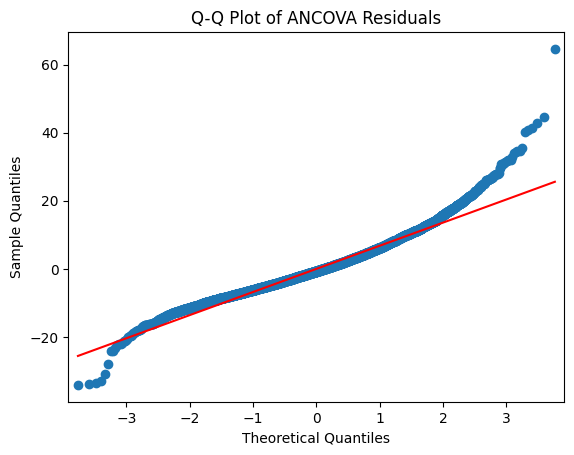

In [ ]:
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of ANCOVA Residuals')
plt.show()

In [ ]:
shapiro_test = stats.shapiro(residuals)
shapiro_test

ShapiroResult(statistic=0.9649319052696228, pvalue=0.0)

In [ ]:
levene_test = stats.levene(df['springgeneralknowledgescore'][df['incomegroup'] == 1],
                           df['springgeneralknowledgescore'][df['incomegroup'] == 2],
                           df['springgeneralknowledgescore'][df['incomegroup'] == 3])
levene_test

LeveneResult(statistic=9.405765903621088, pvalue=8.286000485876772e-05)